In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('Datasets\winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
Y = df.get('quality')
df = df.drop(columns=['quality'])

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


In [5]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


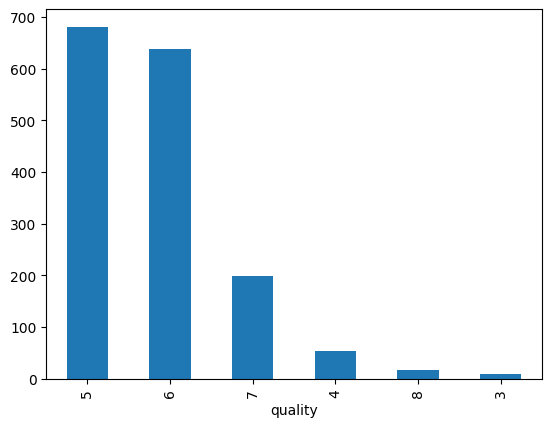

In [6]:
plt.figure()
try:
    sns.countplot(data=df, x='quality')
except ValueError:
    Y.value_counts().plot(kind='bar')
plt.show()

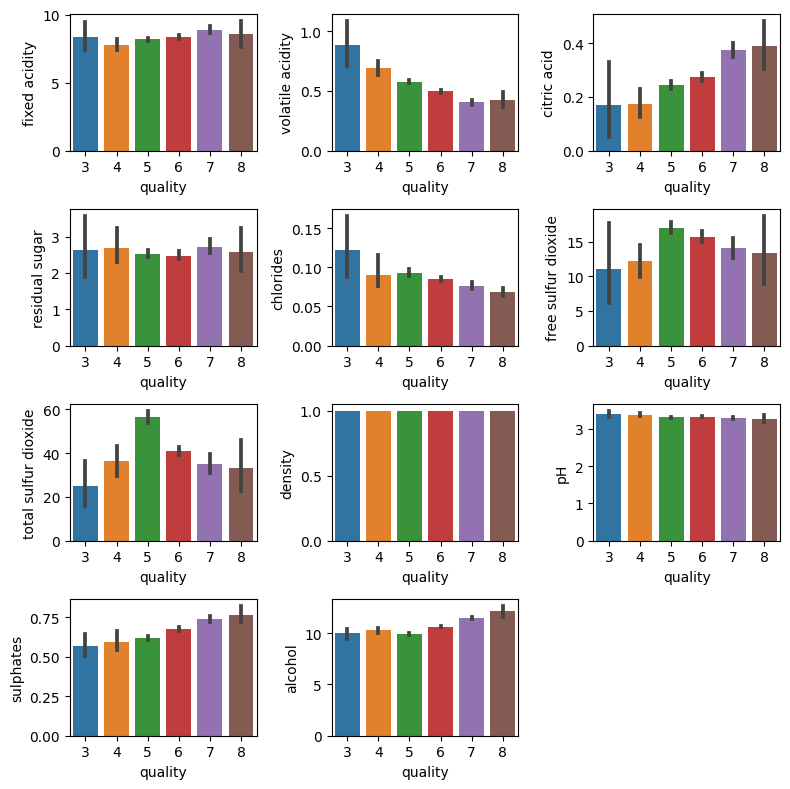

In [7]:
plt.figure(figsize=(8,8))
col = df.columns
for i,c in enumerate(col):
    plt.subplot(4, 3, i + 1)   # 4 rows, 3 columns
    sns.barplot(x=Y,y=df[c])
plt.tight_layout()


<Axes: >

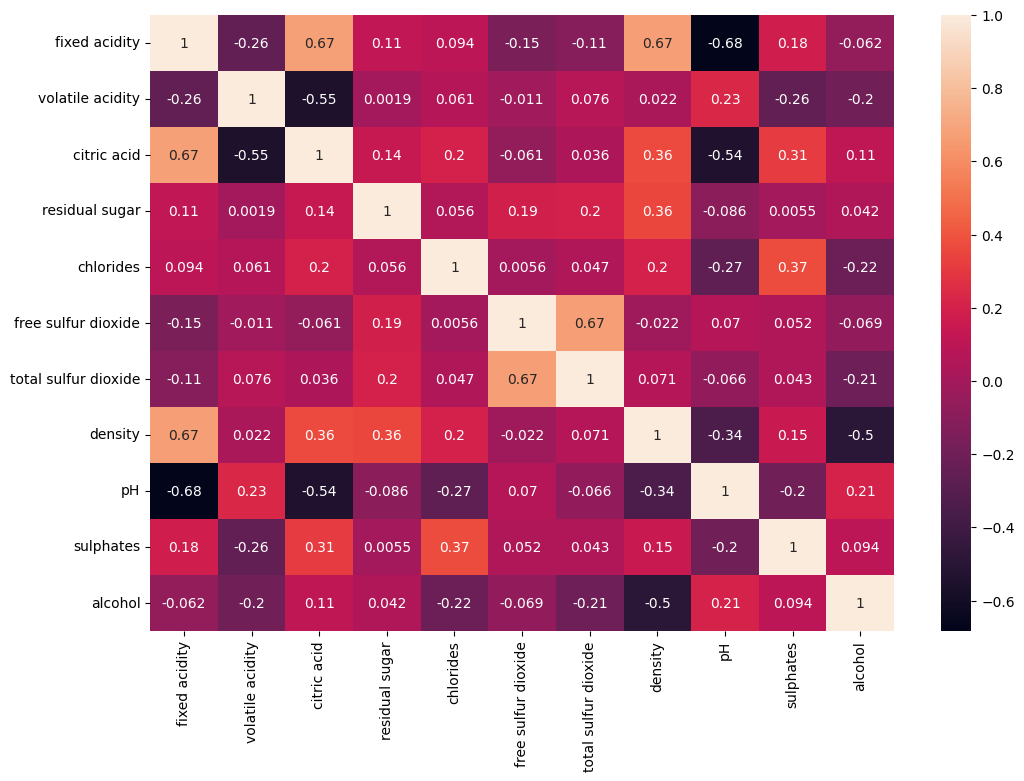

In [8]:
plt.figure(figsize=(12, 8))
cor=df.corr()
sns.heatmap(cor,annot=True)

Text(0.5, 0, 'Values')

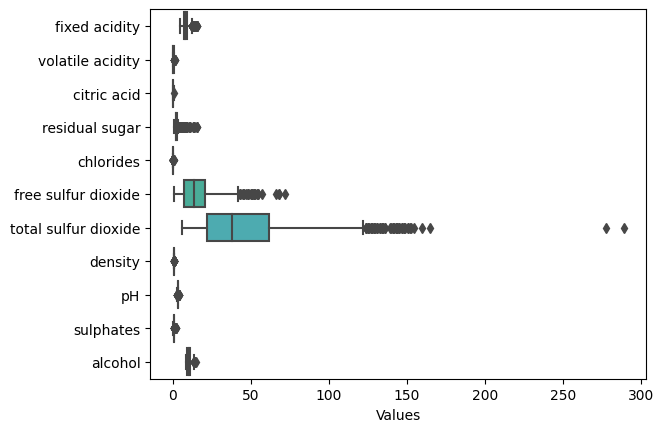

In [9]:
plt.figure()
sns.boxplot(data=df, orient='h')  
#plt.xticks(rotation=90)
plt.xlabel('Values')

In [10]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test ,Y_train ,Y_test = train_test_split(df,Y,test_size=0.2,random_state=100)
print("Train shape ",X_train.shape)
print("Test shape ",X_test.shape)


Train shape  (1279, 11)
Test shape  (320, 11)


In [11]:
up_low_col = dict()
for i in X_train.columns:
    q1 = X_train[i].quantile(0.25)
    q3 = X_train[i].quantile(0.75)
    iqr = q3-q1
    upperL = q3+1.5*iqr
    lowerL = q1-1.5*iqr
    X_train[i] = np.where(X_train[i]>upperL,upperL,np.where(X_train[i]<lowerL,lowerL,X_train[i]))
    up_low_col.update({i:[upperL,lowerL]})

In [12]:

up_low_col = dict()
for i in up_low_col:
    upperL, lowerL = up_low_col[i]
    X_test[i] = np.where(X_train[i]>upperL,upperL,np.where(X_train[i]<lowerL,lowerL,X_train[i]))



fixed acidity : 0.7337437953668307


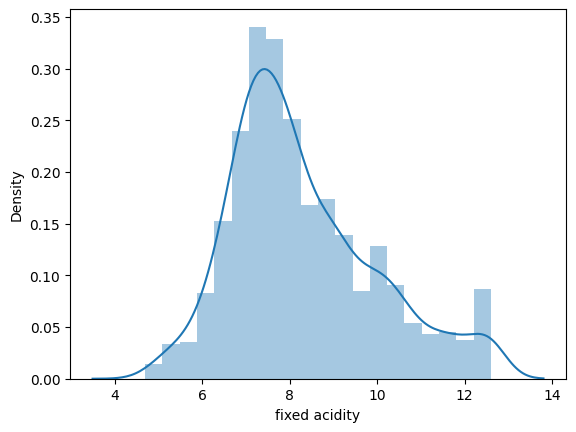

volatile acidity : 0.436110538148101


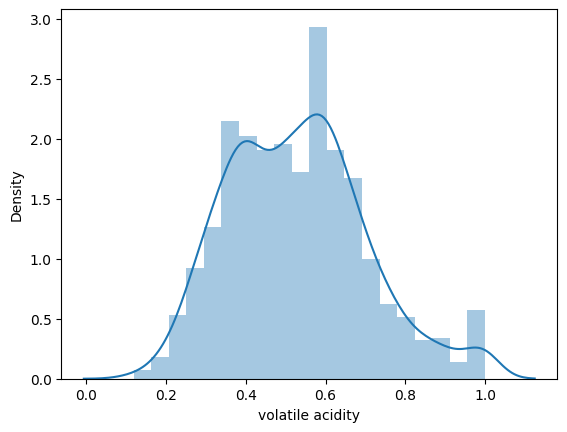

citric acid : 0.32499815476358807


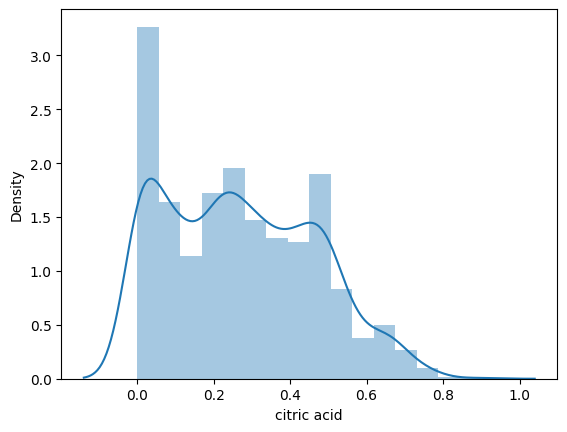

residual sugar : 0.8682563084709823


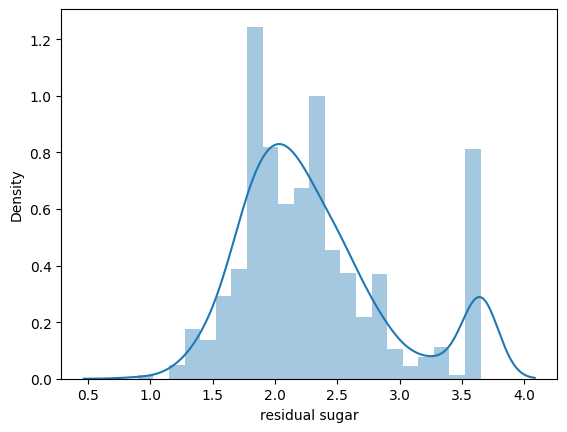

chlorides : 0.4571984336693004


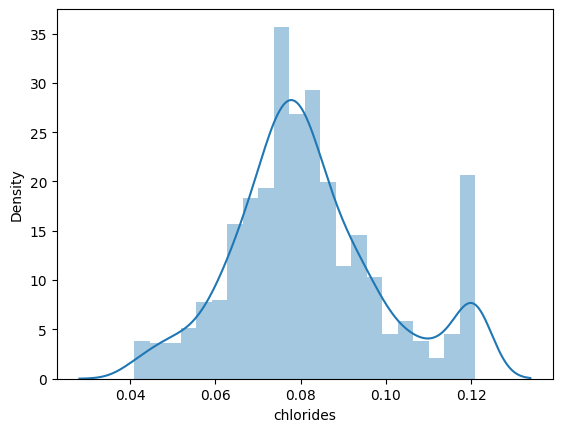

free sulfur dioxide : 0.8936569801403309


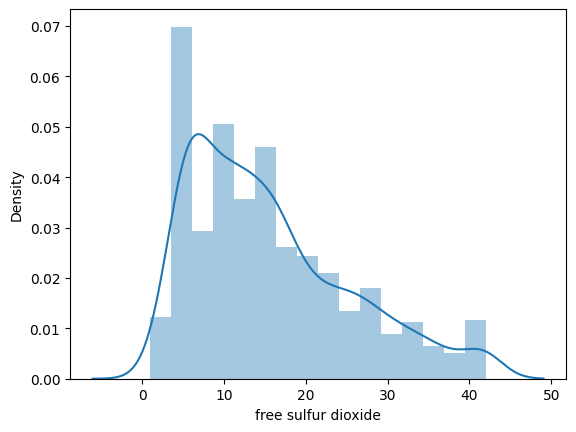

total sulfur dioxide : 0.9680345411480461


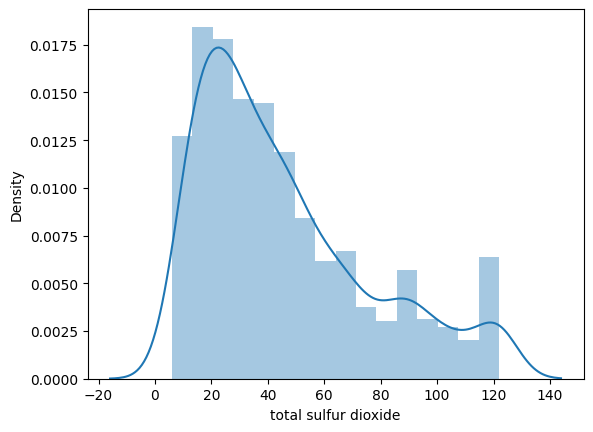

density : 0.04396788413918403


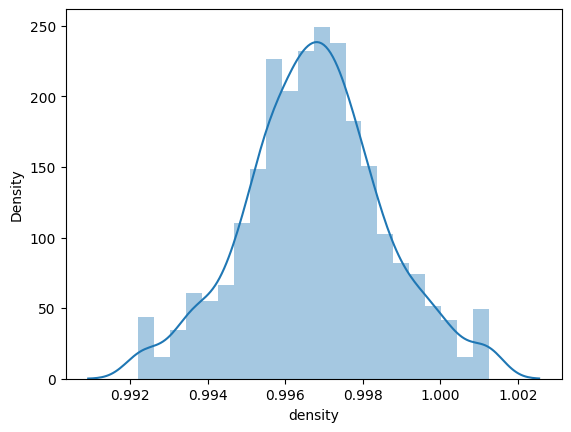

pH : 0.0295057192843738


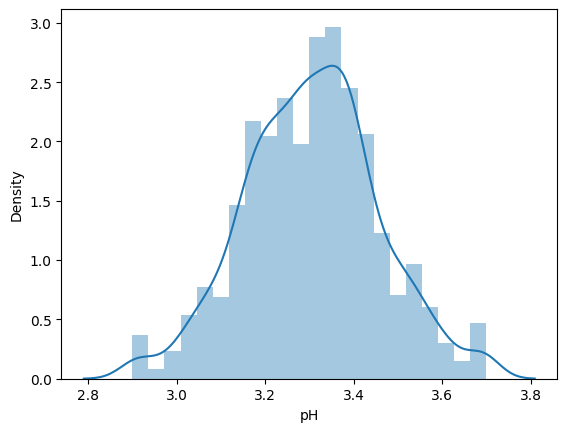

sulphates : 0.792087434442276


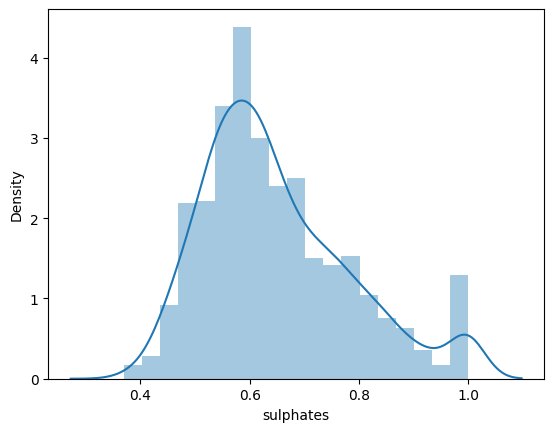

alcohol : 0.8032815455412243


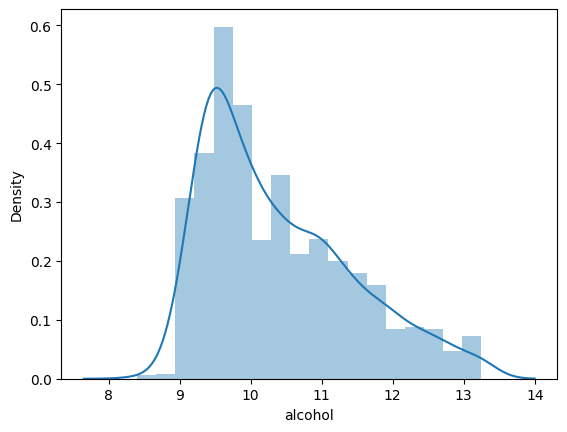

In [13]:
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

for col in X_train.columns:
    print(f"{col} : {skew(X_train[col])}")
    plt.figure()
    sns.distplot(X_train[col])
    plt.show()    
    